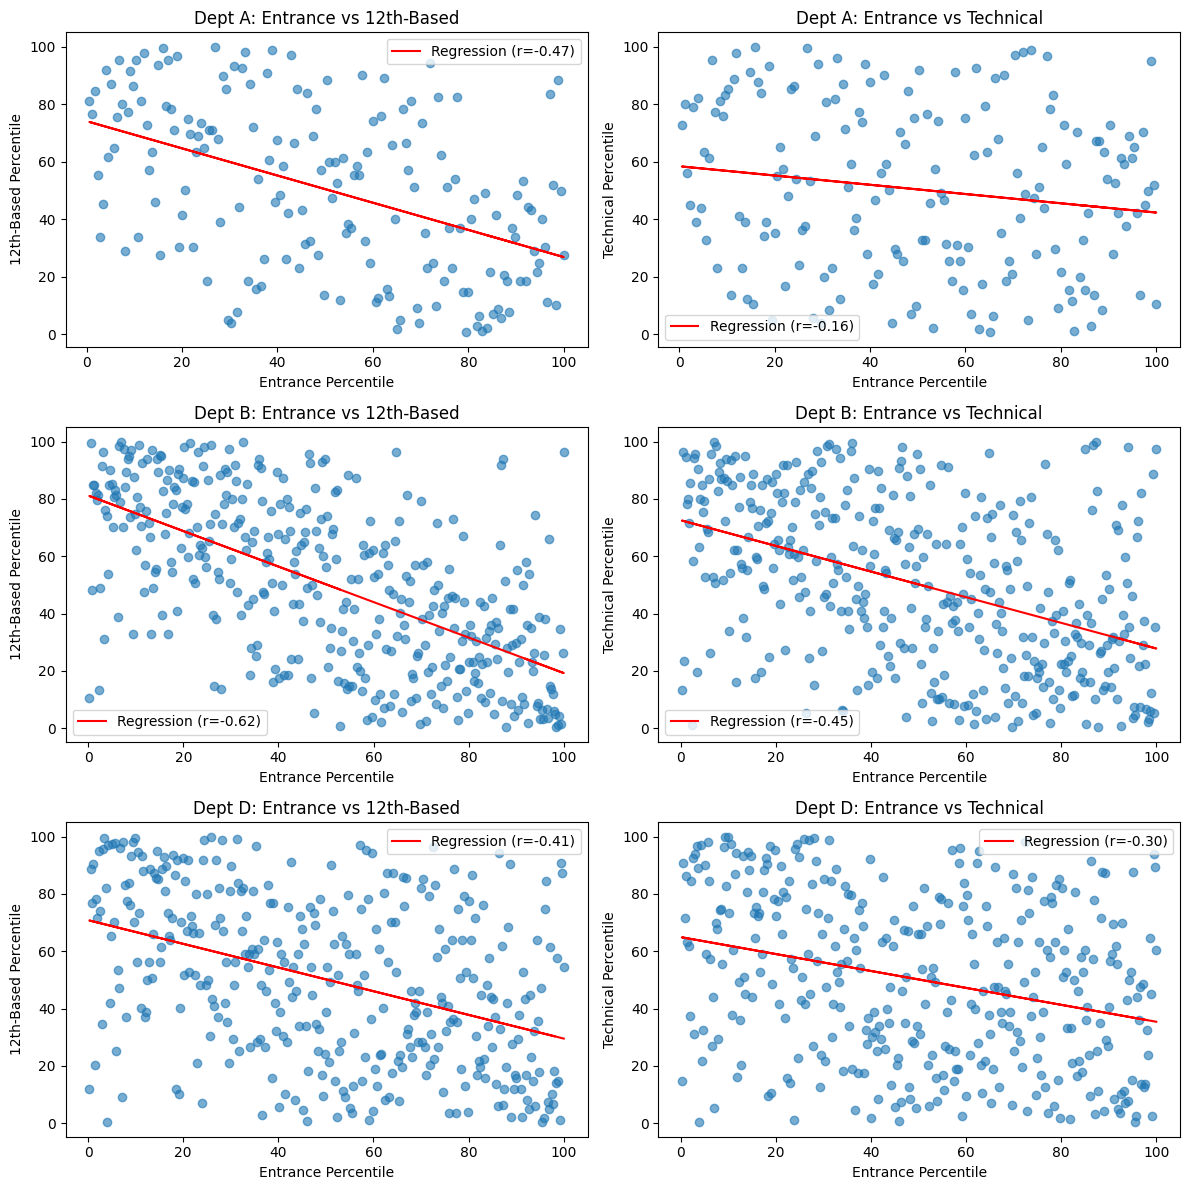

Dept A (12th-Based): y = -0.47x + 74.06, r = -0.47
Dept A (Technical): y = -0.16x + 58.38, r = -0.16
Dept B (12th-Based): y = -0.62x + 81.19, r = -0.62
Dept B (Technical): y = -0.45x + 72.57, r = -0.45
Dept D (12th-Based): y = -0.41x + 70.86, r = -0.41
Dept D (Technical): y = -0.30x + 64.95, r = -0.30


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
college_df = pd.read_csv("college.csv")

# Extract Department and Rank
college_df["Department"] = college_df["Div-1"].str[0]  # First char of Div-1 gives department

# Function to process a department
def analyze_department(dept):
    dept_df = college_df[college_df["Department"] == dept].copy()
    
    # Calculate Entrance Rank Percentile using Roll-1
    dept_df["Entrance Percentile"] = dept_df["Roll-1"].rank(pct=True) * 100
    
    # Compute Averages for 12th-Based and Technical Subjects
    dept_df["12th-Based Avg"] = dept_df[["Math-1 Theory", "Math-2 Theory", "Physics Theory", "Fundamental of Electronics and Electrical Theory"]].mean(axis=1)
    dept_df["Technical Avg"] = dept_df[["Java-1 Theory", "Java-2 Theory", "Data Structures using Java Theory", "DBMS Theory"]].mean(axis=1)
    
    # Convert Averages to Percentiles
    dept_df["12th-Based Percentile"] = dept_df["12th-Based Avg"].rank(pct=True) * 100
    dept_df["Technical Percentile"] = dept_df["Technical Avg"].rank(pct=True) * 100
    
    return dept_df

# Departments to analyze
departments = ["A", "B", "D"]

# Set up subplot grid
fig, axes = plt.subplots(nrows=len(departments), ncols=2, figsize=(12, 12))
regression_results = []

for i, dept in enumerate(departments):
    dept_df = analyze_department(dept)
    
    # Scatter Plot: Entrance Percentile vs 12th-Based Percentile
    ax = axes[i, 0]
    slope, intercept, r_value, _, _ = stats.linregress(dept_df["Entrance Percentile"], dept_df["12th-Based Percentile"])
    ax.scatter(dept_df["Entrance Percentile"], dept_df["12th-Based Percentile"], alpha=0.6)
    ax.plot(dept_df["Entrance Percentile"], slope * dept_df["Entrance Percentile"] + intercept, color='red', label=f'Regression (r={r_value:.2f})')
    ax.set_title(f"Dept {dept}: Entrance vs 12th-Based")
    ax.set_xlabel("Entrance Percentile")
    ax.set_ylabel("12th-Based Percentile")
    ax.legend()
    regression_results.append(f"Dept {dept} (12th-Based): y = {slope:.2f}x + {intercept:.2f}, r = {r_value:.2f}")
    
    # Scatter Plot: Entrance Percentile vs Technical Percentile
    ax = axes[i, 1]
    slope, intercept, r_value, _, _ = stats.linregress(dept_df["Entrance Percentile"], dept_df["Technical Percentile"])
    ax.scatter(dept_df["Entrance Percentile"], dept_df["Technical Percentile"], alpha=0.6)
    ax.plot(dept_df["Entrance Percentile"], slope * dept_df["Entrance Percentile"] + intercept, color='red', label=f'Regression (r={r_value:.2f})')
    ax.set_title(f"Dept {dept}: Entrance vs Technical")
    ax.set_xlabel("Entrance Percentile")
    ax.set_ylabel("Technical Percentile")
    ax.legend()
    regression_results.append(f"Dept {dept} (Technical): y = {slope:.2f}x + {intercept:.2f}, r = {r_value:.2f}")

plt.tight_layout()
plt.show()

# Print regression results
for result in regression_results:
    print(result)